# Bangla Handwritten Digits Recognition
Using With Shallow Nural Network

*Dataset Source: [Bengali.ai](https://bengali.ai/)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
# Loading the dataset
X_train = pd.read_json('./dataset/train_images.json', ' ').to_numpy().T
Y_train = pd.read_json('./dataset/train_labels.json', ' ').to_numpy()
X_test = pd.read_json('./dataset/test_images.json', ' ').to_numpy().T
Y_test = pd.read_json('./dataset/test_labels.json', ' ').to_numpy()

# Setting up the label
ohe_y = OneHotEncoder()
Y_train = ohe_y.fit_transform(Y_train).toarray().T
Y_test = ohe_y.fit_transform(Y_test).toarray().T

# Checking the shape of the dataset
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Normalizing the dataset
X_test = X_test / 255
X_train = X_train / 255

(784, 23824)
(10, 23824)
(784, 2653)
(10, 2653)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


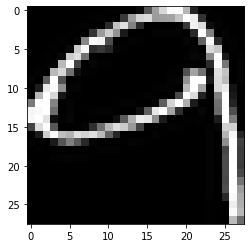

In [3]:
# Checking up some data
index = 123
temp_x_data = X_train.T[index].reshape(28, 28)
temp_y_data = Y_train.T[index]

plt.imshow(temp_x_data, cmap='gray')
print(temp_y_data)

In [4]:
# Getting shapes and sizes
m_train = Y_train.shape[1]
m_test = Y_test.shape[1]

# Size of input and output
n_x = X_test.shape[0]
n_y = Y_test.shape[0]

print('Number of training data: ' + str(m_train))
print('Number of testing data: ' + str(m_test))

print('Number of input params: ' + str(n_x))
print('Number of output params: ' + str(n_y))

Number of training data: 23824
Number of testing data: 2653
Number of input params: 784
Number of output params: 10


In [5]:
from NeuralNet import NeuralNetwork

# It's time for my deep neural net class

Cost after iteration 0: 6.932421
Cost after iteration 200: 0.808167
Cost after iteration 400: 0.530646
Cost after iteration 600: 0.436768
Cost after iteration 800: 0.380756
Cost after iteration 1000: 0.341727
Cost after iteration 1200: 0.311797
Cost after iteration 1400: 0.286966
Cost after iteration 1600: 0.265450
Cost after iteration 1800: 0.246383
Cost after iteration 2000: 0.229308
Cost after iteration 2200: 0.213865
Cost after iteration 2400: 0.199915
Cost after iteration 2600: 0.187334
Cost after iteration 2800: 0.175983
Cost after iteration 3000: 0.165717
Cost after iteration 3200: 0.156396
Cost after iteration 3400: 0.147911
Cost after iteration 3600: 0.140096
Cost after iteration 3800: 0.132872
Cost after iteration 4000: 0.126153
Cost after iteration 4200: 0.119904
Cost after iteration 4400: 0.114067
Cost after iteration 4600: 0.108597
Cost after iteration 4800: 0.103462


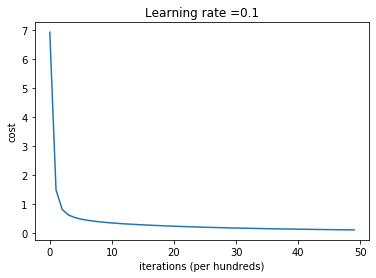

In [6]:
classifier = NeuralNetwork([n_x, 100, n_y])
classifier.fit(X_train, Y_train, 0.1, 5000, 200, True)

Cost after iteration 0: 6.930937
Cost after iteration 200: 3.214536
Cost after iteration 400: 1.332189
Cost after iteration 600: 0.593635
Cost after iteration 800: 0.424259
Cost after iteration 1000: 0.346967
Cost after iteration 1200: 0.295473
Cost after iteration 1400: 0.255373
Cost after iteration 1600: 0.222114
Cost after iteration 1800: 0.194259
Cost after iteration 2000: 0.170597
Cost after iteration 2200: 0.150142
Cost after iteration 2400: 0.132275
Cost after iteration 2600: 0.116683
Cost after iteration 2800: 0.102991
Cost after iteration 3000: 0.090990
Cost after iteration 3200: 0.080413
Cost after iteration 3400: 0.071060
Cost after iteration 3600: 0.062819
Cost after iteration 3800: 0.055613
Cost after iteration 4000: 0.049339
Cost after iteration 4200: 0.043884
Cost after iteration 4400: 0.039146
Cost after iteration 4600: 0.035039
Cost after iteration 4800: 0.031477


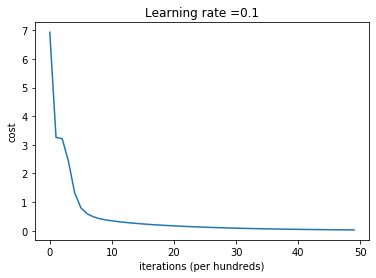

In [7]:
classifier2 = NeuralNetwork([n_x, 100, 100, n_y])
classifier2.fit(X_train, Y_train, 0.1, 5000, 200, True)

Cost after iteration 0: 6.931419
Cost after iteration 200: 3.249633
Cost after iteration 400: 3.249452
Cost after iteration 600: 3.248906
Cost after iteration 800: 3.244732
Cost after iteration 1000: 2.800590
Cost after iteration 1200: 2.507508
Cost after iteration 1400: 2.116896
Cost after iteration 1600: 1.546172
Cost after iteration 1800: 0.865976
Cost after iteration 2000: 0.404524
Cost after iteration 2200: 0.251351
Cost after iteration 2400: 0.178952
Cost after iteration 2600: 0.183270
Cost after iteration 2800: 0.103154
Cost after iteration 3000: 0.078993
Cost after iteration 3200: 0.061372
Cost after iteration 3400: 0.047465
Cost after iteration 3600: 0.037386
Cost after iteration 3800: 0.030078
Cost after iteration 4000: 0.024582
Cost after iteration 4200: 0.020371
Cost after iteration 4400: 0.017277
Cost after iteration 4600: 0.014776
Cost after iteration 4800: 0.012600


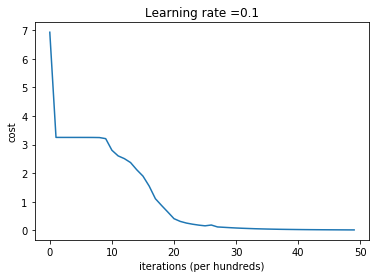

In [9]:
classifier3 = NeuralNetwork([n_x, 100, 100, 100, n_y])
classifier3.fit(X_train, Y_train, 0.1, 5000, 200, True)

(10, 2653)
Predicted:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual Value:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


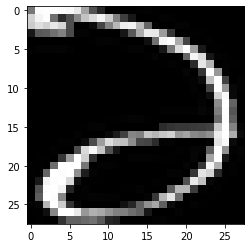

In [10]:
P_test = classifier.predict(X_test)
P_test = (P_test == np.max(P_test, axis=0)) + np.zeros((10,1))
print(P_test.shape)
index = 31
print("Predicted:")
print(P_test.T[index])
print("Actual Value:")
print(Y_test.T[index])
plt.imshow(X_test.T[index].reshape(28,28), cmap='gray')

In [11]:
def score(X, Y, classifier):
    P = classifier.predict(X)
    P = (P == np.max(P, axis=0)) + np.zeros((10,1))
    accuracy = np.equal(Y.T, P.T) + 0
    score = np.sum(accuracy) / (accuracy.shape[0]*accuracy.shape[1]) * 100
    
    return score

In [17]:
print("Classifier 1 with n_x, 100, n_y layers")
score_test = score(X_test, Y_test, classifier)
score_train = score(X_train, Y_train, classifier)
print("Score on test data: " + str(score_test) + "%")
print("Score on train data: " + str(score_train) + "%")

print("\nClassifier 2 with n_x, 100, 100, n_y layers")
score_test2 = score(X_test, Y_test, classifier2)
score_train2 = score(X_train, Y_train, classifier2)
print("Score on test data: " + str(score_test2) + "%")
print("Score on train data: " + str(score_train2) + "%")

print("\nClassifier 3 with n_x, 100, 100, 100, n_y layers")
score_test3 = score(X_test, Y_test, classifier3)
score_train3 = score(X_train, Y_train, classifier3)
print("Score on test data: " + str(score_test3) + "%")
print("Score on train data: " + str(score_train3) + "%")

Classifier 1 with n_x, 100, n_y layers
Score on test data: 99.36675461741424%
Score on train data: 99.82874412357286%

Classifier 2 with n_x, 100, 100, n_y layers
Score on test data: 99.36675461741424%
Score on train data: 99.97649429147079%

Classifier 3 with n_x, 100, 100, 100, n_y layers
Score on test data: 99.2687523558236%
Score on train data: 99.99076561450639%


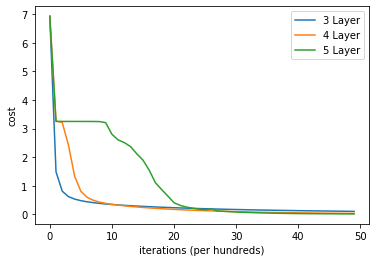

In [18]:
plt.plot(np.squeeze(classifier.costs), label="3 Layer")
plt.plot(np.squeeze(classifier2.costs), label="4 Layer")
plt.plot(np.squeeze(classifier3.costs), label="5 Layer")
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.legend()
plt.show()